In [1]:
import numpy as np
pi=np.pi
from functools import partial
#
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.5.4.dev30+g9412a0a43.d20260107'

# Nuclei

In [4]:
# Coulomb
nucleus_coulomb = phr.nucleus('Al27_coulomb',Z=13,A=27)

In [5]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_FB = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [6]:
from mpmath import polylog

In [7]:
polylog(2,-np.exp(3.07/0.519))

mpf('-19.137160992678471')

In [8]:
# Fermi (2 parameter)
nucleus_2pF = phr.nucleus('Al27_2pF',Z=13,A=27,c=3.07,z=0.519)
nucleus_2pF.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Al27_2pFfermi2p_x=0.0-1000.0-1.0.txt


In [9]:
# Gauss
nucleus_gauss = phr.nucleus('Al27_gauss',Z=13,A=27,b=2.48)

In [10]:
# Uniform
nucleus_uni = phr.nucleus('Al27_uni',Z=13,A=27,rc=3.92)

In [11]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

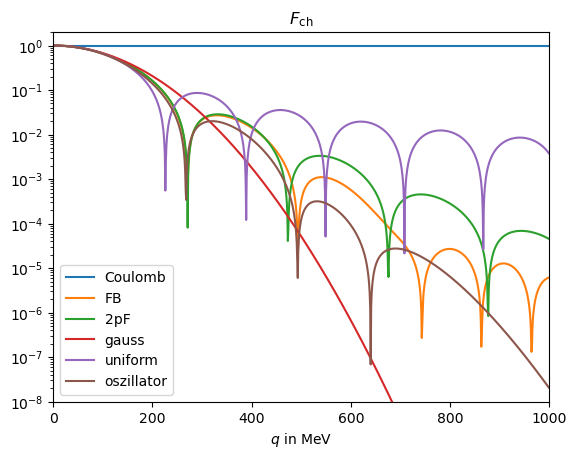

In [12]:
q=np.arange(1,1000,1.)
plt.plot(q,np.abs(nucleus_coulomb.form_factor(q)),label='Coulomb')
plt.plot(q,np.abs(nucleus_FB.form_factor(q)),label='FB')
plt.plot(q,np.abs(nucleus_2pF.form_factor(q)),label='2pF')
plt.plot(q,np.abs(nucleus_gauss.form_factor(q)),label='gauss')
plt.plot(q,np.abs(nucleus_uni.form_factor(q)),label='uniform')
plt.plot(q,np.abs(nucleus_osz.form_factor(q)),label='oszillator')
plt.title(r'$F_\operatorname{ch}$')
plt.xlabel(r'$q$ in MeV')
plt.ylim(1e-8,2)
plt.xlim(0,1000)
plt.yscale('log')
plt.legend()
plt.show()

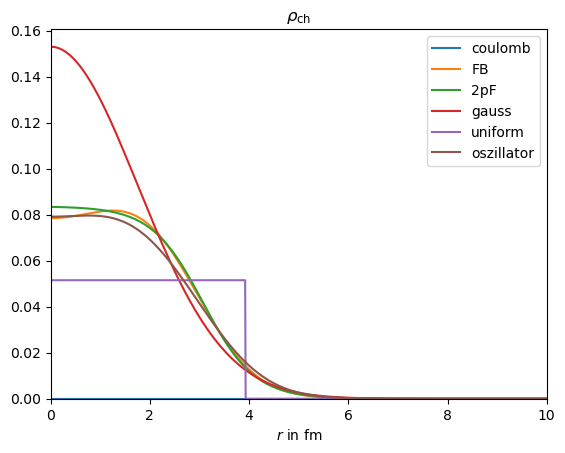

In [13]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_coulomb.charge_density(r),label='coulomb')
plt.plot(r,nucleus_FB.charge_density(r),label='FB')
plt.plot(r,nucleus_2pF.charge_density(r),label='2pF')
plt.plot(r,nucleus_gauss.charge_density(r),label='gauss')
plt.plot(r,nucleus_uni.charge_density(r),label='uniform')
plt.plot(r,nucleus_osz.charge_density(r),label='oszillator')
plt.xlim(0,10)
plt.ylim(0,)
plt.title(r'$\rho_\operatorname{ch}$')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

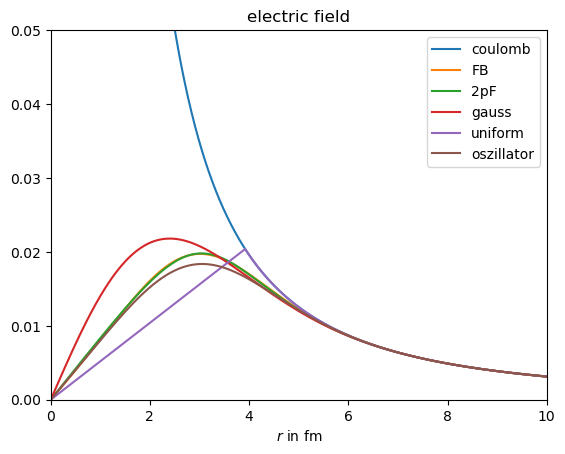

In [14]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_field(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_field(r),label='FB')
plt.plot(r,nucleus_2pF.electric_field(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_field(r),label='gauss')
plt.plot(r,nucleus_uni.electric_field(r),label='uniform')
plt.plot(r,nucleus_osz.electric_field(r),label='oszillator')
plt.xlim(0,10)
plt.ylim(0,0.05)
plt.title(r'electric field')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

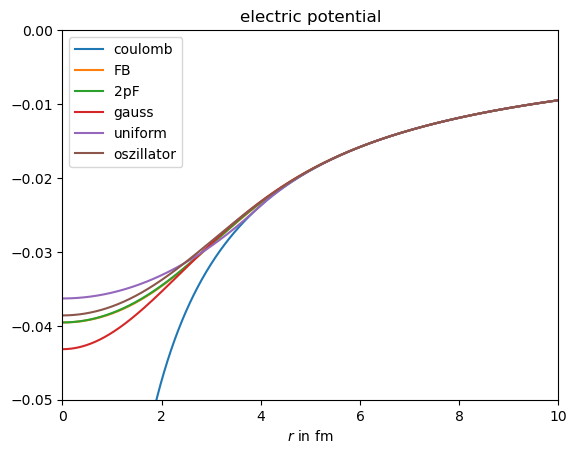

In [15]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_potential(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_potential(r),label='FB')
plt.plot(r,nucleus_2pF.electric_potential(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_potential(r),label='gauss')
plt.plot(r,nucleus_uni.electric_potential(r),label='uniform')
plt.plot(r,nucleus_osz.electric_potential(r),label='oszillator')
plt.ylim(-0.05,0)
plt.xlim(0,10)
plt.title(r'electric potential')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

## References (mainly de Vries et al. 1987)

In [16]:
nuclei={}
previous = ('',0,0)
for (name,A,Z) in phr.nuclei.references.onfile:
    if previous != (name,A,Z):
        nucleus = phr.nuclei.references.load_reference_nucleus(Z=Z,A=A)
        counter = 1
        if type(nucleus)==list:
            for nucleus_i in nucleus:
                nuclei[name+'_ref'+str(counter)] = nucleus_i
                counter+=1
        else:
            nuclei[name+'_ref'+str(counter)] = nucleus
        previous = (name,A,Z)

Warning total charge for 6Li_ref1 deviates more than 1e-3: Z=3, Q=2.9911703492816275
Warning total charge for 10B_ref1 deviates more than 1e-3: Z=5, Q=5.040468192885473
Warning total charge for 64Ni_ref1 deviates more than 1e-3: Z=28, Q=27.93996979272232


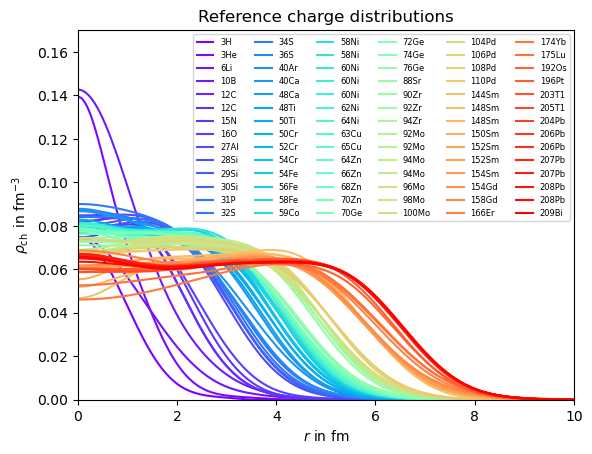

In [17]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,12,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,10)
plt.ylim(0,0.17)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=6)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

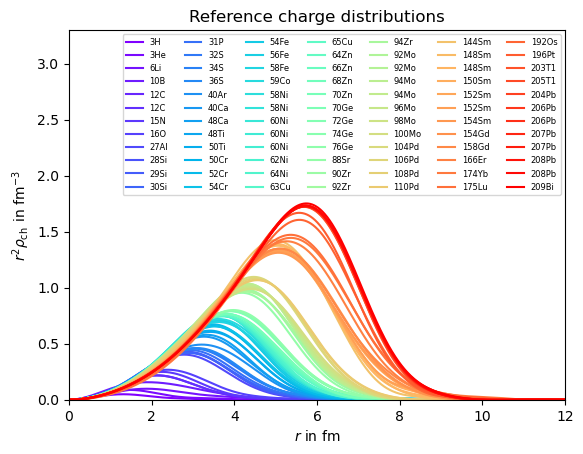

In [18]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,15,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,r**2*nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,12)
plt.ylim(0,3.3)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$r^2\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=7)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

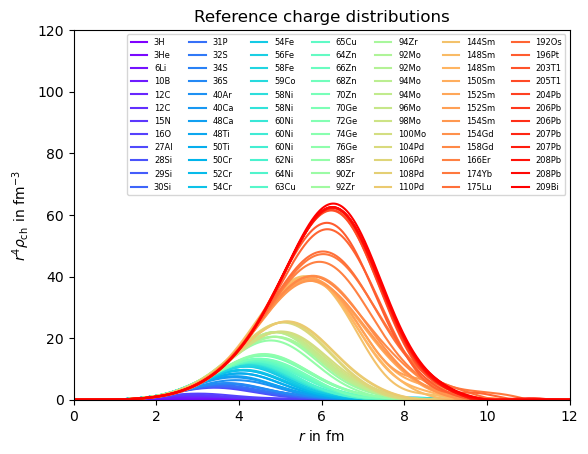

In [19]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,15,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,r**4*nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,12)
plt.ylim(0,120)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$r^4\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=7)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

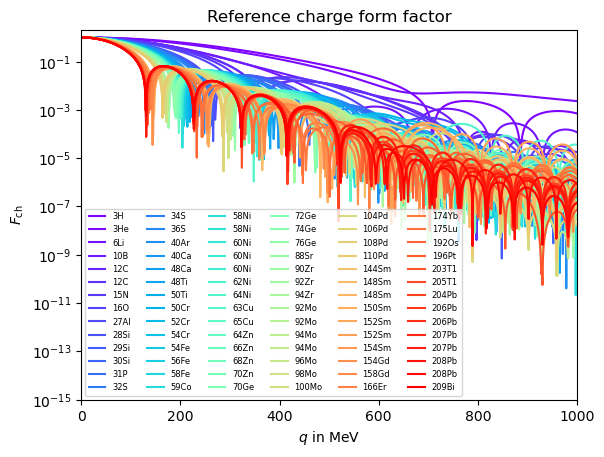

In [20]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

q=np.arange(1,1000,1.)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(q,np.abs(nucleus.form_factor(q)),label=nucleus_name[:-5])
plt.ylim(1e-15,2)
plt.xlim(0,1000)
plt.title(r'Reference charge form factor')
plt.yscale('log')
plt.ylabel(r'$F_\operatorname{ch}$')
plt.xlabel(r'$q$ in MeV')
plt.legend(loc='lower left',fontsize=6,ncol=6)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

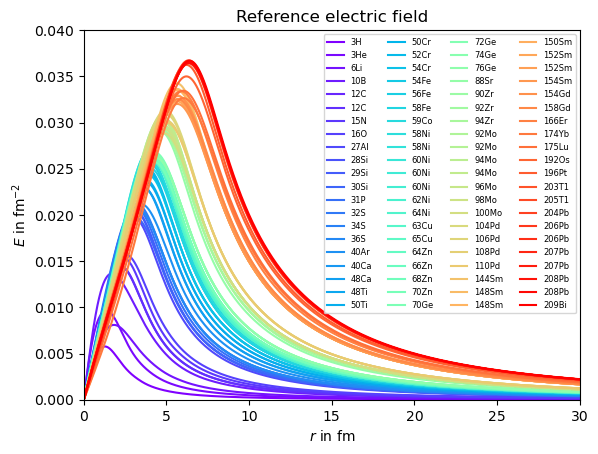

In [21]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,30,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.electric_field(r),label=nucleus_name[:-5])
plt.xlim(0,30)
plt.ylim(0,0.04)
plt.title(r'Reference electric field')
plt.ylabel(r'$E$ in fm$^{-2}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=4)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

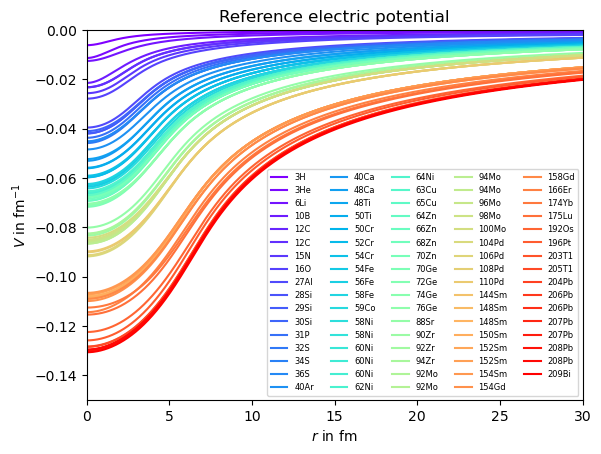

In [22]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,30,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.electric_potential(r),label=nucleus_name[:-5])
plt.ylim(-0.15,0)
plt.xlim(0,30)
plt.title(r'Reference electric potential')
plt.ylabel(r'$V$ in fm$^{-1}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='lower right',fontsize=6,ncol=5)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

# Boundstates

In [23]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [24]:
#corrected_potential=phr.dirac_solvers.QED_corrections.potential_corrections(nucleus_Al27,included_corrections=['Uehling_2','Uehling_4','vs'])
corrected_potential=phr.dirac_solvers.QED_corrections.potential_corrections(nucleus_Al27,included_corrections=['Uehling_2'])

Calculating QED potential corrections...
Continuing corrections to high energies below threshold 0.0001...


In [25]:
boundstates_l0_Al27 = phr.boundstates(nucleus_Al27,kappa=-1,lepton_mass=phr.masses.mmu,corrected_potential=corrected_potential,renew=False) 
print('E_1s=',boundstates_l0_Al27.energy_levels[0],'MeV') 

E_1s= -0.49136016156850104 MeV


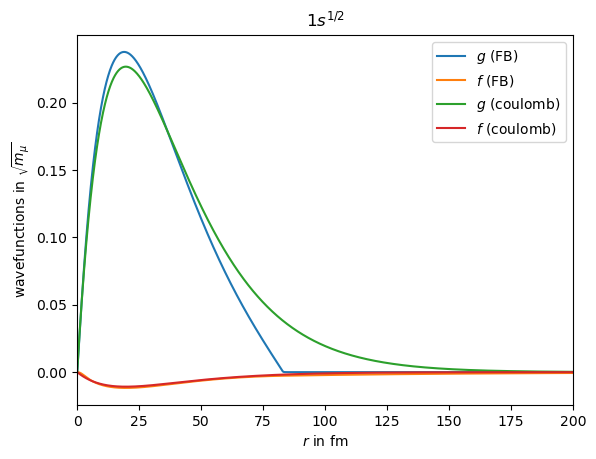

In [26]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_1s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27.wavefunction_f_1s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,np.real(g_c(r)),label=r'$g$ (coulomb)')
plt.plot(r,np.real(f_c(r)),label=r'$f$ (coulomb)')

plt.title(r'$1s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [27]:
boundstates_l0_Al27.find_next_solution()

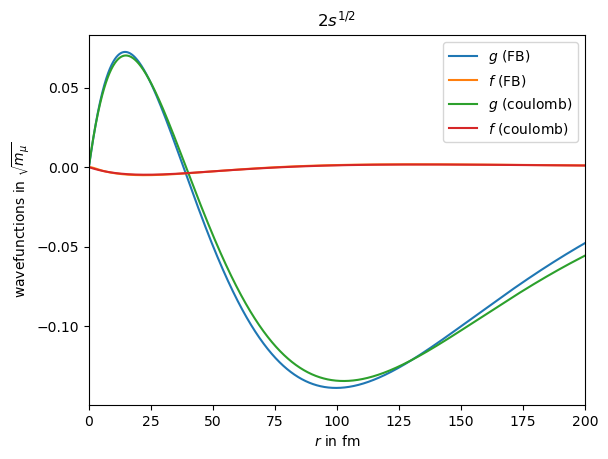

In [28]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_2s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27.wavefunction_f_2s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,np.real(g_c(r)),label=r'$g$ (coulomb)')
plt.plot(r,np.real(f_c(r)),label=r'$f$ (coulomb)')

plt.title(r'$2s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [29]:
boundstates_l1_Al27 = phr.boundstates(nucleus_Al27,kappa=+1,lepton_mass=phr.masses.mmu, corrected_potential=corrected_potential,renew=False) 
print('E_2p12=',boundstates_l1_Al27.energy_levels[0],'MeV') 

E_2p12= -0.11921144660932725 MeV


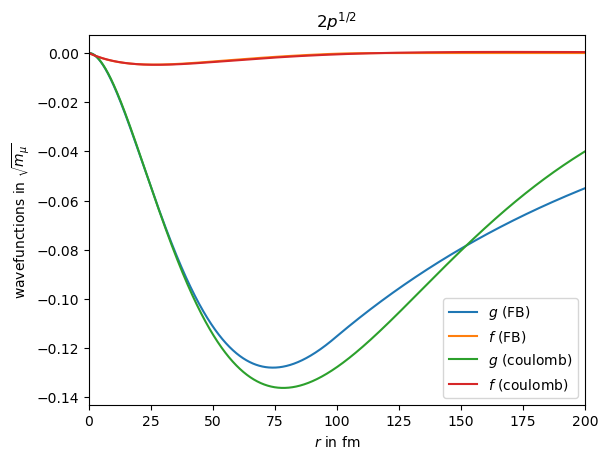

In [30]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l1_Al27.wavefunction_g_2p12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l1_Al27 .wavefunction_f_2p12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,np.real(g_c(r)),label=r'$g$ (coulomb)')
plt.plot(r,np.real(f_c(r)),label=r'$f$ (coulomb)')

plt.title(r'$2p^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

# Continuumstates

In [34]:
continuumstates_l0_Al27 = phr.continuumstates(nucleus_Al27,kappa=1500,energy=1000,verbose=True,corrected_potential=corrected_potential,potential_precision=1e-3,asymptotic_radius=1000,dps_hyper1f1=100)
continuumstates_l0_Al27.solve_IVP()
#continuumstates_l0_Al27.extract_phase_shift()
continuumstates_l0_Al27.phase_shift

r0= 0.1592 fm
rc= 344.00000000000006 fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 0.1592  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 0.3184  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 0.6368  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 1.2736  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 2.5472  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 5.0944  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 10.1888  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 20.3776  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 40.7552  fm
initial_coulomb -0.0
critical_coulomb 1.755676724674263
radius 81.5104  fm
initial_coulomb -2.4306671715019943e-241
critical_coulomb 1.755676724674263
radius 163.0208  fm
initial_coulomb -0.8952767323337237
critical_coulomb 1.755676724674263
radius 326.0416  fm
Adjusted beginning radius to 

np.float64(-1.0994869799713998)

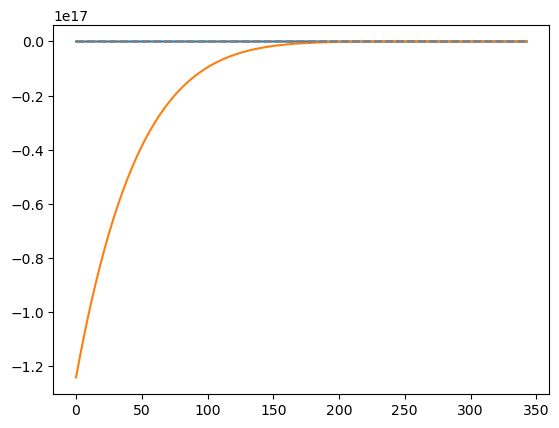

In [36]:
r=np.arange(0,343,0.1)
plt.plot(r,continuumstates_l0_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l0_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
#plt.ylim(-2,2)
#plt.xlim(50,400)

In [ ]:
continuumstates_l1_Al27 = phr.continuumstates(nucleus_Al27,kappa=+1,energy=250)
continuumstates_l1_Al27.solve_IVP()

In [ ]:
r=np.arange(0,50,0.1)
plt.plot(r,continuumstates_l1_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l1_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,50)

# Crosssection

In [ ]:
ai_Xe132=np.array([ 0.05740165,  0.05250304, -0.03442148, -0.02282753,  0.01333736])
R_Xe132=10.0
nucleus_Xe132 = phr.nucleus('132Xe_FB',Z=54,A=132,ai=ai_Xe132,R=R_Xe132)
corrected_potential=phr.dirac_solvers.QED_corrections.potential_corrections(nucleus_Xe132,included_corrections=['Uehling_2','Uehling_4','vs'])

In [ ]:
args_1 = {'method': np.str_('DOP853'), 'N_partial_waves': np.int64(40), 'atol': np.float64(1e-12), 'rtol': np.float64(1e-10), 'energy_norm': np.float64(0.01973269804), 'phase_difference_limit': np.float64(1e-06)}
args_2 = {'method': np.str_('DOP853'), 'N_partial_waves': np.int64(50), 'atol': np.float64(1e-12), 'rtol': np.float64(1e-10), 'energy_norm': np.float64(0.01973269804), 'phase_difference_limit': np.float64(1e-07)}

In [ ]:
energy=1200
theta=np.arange(5,60,1e-1)
crosssection_1=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_Xe132,verbose=True,save_and_load_phase_shifts=False,corrected_potential=corrected_potential,
                                    potential_precision=1e-3,asymptotic_radius=1000,**args_1)
crosssection_2=phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_Xe132,verbose=True,save_and_load_phase_shifts=False,corrected_potential=corrected_potential,
                                    potential_precision=1e-3,asymptotic_radius=1000,**args_2)
plt.plot(theta,(crosssection_1-crosssection_2)/crosssection_2,label=r'$E=1200~$MeV')

In [ ]:
energy=1000
theta=np.arange(4,6,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_Xe132,verbose=True,save_and_load_phase_shifts=True),label=r'$E=1200~$MeV')
#plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_Xe132,verbose=True,save_and_load_phase_shifts=True),label=r'$E=301~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{132}$Xe")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

In [ ]:
energy=301
theta=np.arange(20,60,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_Xe132,verbose=True),label=r'$E=301~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{132}$Xe")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

In [ ]:
energy=301
theta=np.arange(20,60,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_Xe132,verbose=True,N_processes=30),label=r'$E=301~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{132}$Xe")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

In [ ]:
## assess necessary precision 
# takes a long time, but enables fastest possible evaluation once these are set
# Uncomment to run again (>5min)
energy=1000
theta=np.arange(4,6,1e-1)
args=phr.optimise_crosssection_precision(energy,theta*pi/180,nucleus_Xe132,crosssection_precision=1e-8)

In [ ]:
# results of the upper call:
args = {'method': np.str_('DOP853'), 'N_partial_waves': np.int64(70), 'atol': np.float64(1e-06), 'rtol': np.float64(1e-06), 'energy_norm': np.float64(0.01973269804), 'phase_difference_limit': np.float64(1e-06)}

In [ ]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,verbose=True,**args),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

## Numerical

In [ ]:
ai_48Ti=np.array([0.03392,0.05913,0.01547,-0.02550,-0.0152,0.0029,0.0037])
R_48Ti=9.25
N_48Ti=len(ai_48Ti)
qi_48Ti = np.arange(1,N_48Ti+1)*np.pi/R_48Ti
def rho_48Ti(r): return phr.nuclei.parameterizations.fourier_bessel.charge_density_FB(r,ai_48Ti,R_48Ti,qi_48Ti)
nucleus_48Ti_num = phr.nucleus('48Ti_num',Z=22,A=48,charge_density=rho_48Ti)

In [ ]:
nucleus_48Ti_num.fill_gaps()

In [ ]:
nucleus_48Ti_num.set_electric_field_from_charge_density()
nucleus_48Ti_num.set_electric_potential_from_electric_field()
nucleus_48Ti_num.set_Vmin()

In [ ]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti_num),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

# Overlap integrals

In [ ]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz_Al27 = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

In [ ]:
phr.overlap_integral_dipole(nucleus_osz_Al27)

In [ ]:
phr.overlap_integral_scalar(nucleus_osz_Al27,'p')

In [ ]:
phr.overlap_integral_scalar(nucleus_osz_Al27,'n')

In [ ]:
phr.overlap_integral_vector(nucleus_osz_Al27,'p')

In [ ]:
phr.overlap_integral_vector(nucleus_osz_Al27,'n')

# PVES

In [ ]:
# PVES calculations are more time intensive as energies are generally higher and they require extremely high precison on the crosssection

In [ ]:
# Example Nucleus from Horowitz 1998

In [ ]:
nucleus_Pb208 = phr.nucleus('Pb208_Hor98_095',Z=82,A=208,c=6.4,z=0.54,w=0.32)
def weak_density_model(r,lam,nucleus): return (nucleus.Qw/nucleus.Z)*lam**3*nucleus.charge_density(lam*r)
nucleus_Pb208.weak_density = partial(weak_density_model,lam=0.9502,nucleus=Pb208_test)
nucleus_Pb208.update_dependencies()
nucleus_Pb208.fill_gaps()

In [ ]:
nucleus_Pb208.__dict__

In [ ]:
r=np.arange(0,12,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,nucleus_Pb208.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-nucleus_Pb208.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=0.95}$')
plt.xlim(0,12)
plt.ylim(0,0.09)
plt.legend()

In [ ]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_208Pb = phr.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_Pb208,verbose=True)

In [ ]:
plt.title(r'PVES $^{208}$Pb') #Horowitz 1998
plt.plot(theta_deg,A_PV_208Pb,label=r'$\lambda=0.9502$')
plt.ylim(0,4e-6)
plt.xlim(0,15)
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"left-right asymmetry")
plt.legend()

In [ ]:
## assess necessary precision 
# takes a long time, but enables faster evaluation once these are set
# Uncomment to run again (>30min)
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
args_APV_208Pb=phr.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,nucleus_Pb208,left_right_asymmetry_precision=1e-2)

In [ ]:
# results of the upper call:
args = {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-08}

In [ ]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_208Pb_opt = phr.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_Pb208,verbose=True,**args_APV_Pb208)

In [ ]:
plt.title('Horowitz 1998')
plt.plot(theta_deg,A_PV_208Pb_opt,label=r'$\lambda=0.9502$')
#
plt.ylim(0,4e-6)
plt.xlim(0,15)
plt.legend()